In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np
from netCDF4 import Dataset
import cartopy.crs as ccrs
import seawater as sw
import xarray as xr
import matplotlib.pyplot as plt
import glob
from matplotlib.collections import PatchCollection
from matplotlib.collections import PolyCollection

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----view
-----quickplots
-----quickplots


In [5]:
class Simulation(object):
    def __init__(self):
        return

In [6]:
# runs = ['nib1915_zlev_sft1', 'nib1916_zstar_sft12', 'nib1917_zstar_sft14', 'nib1918_zstar_sft15']
# runs = ['nib1919_zlev_sft1_precip', 
#         'nib1920_zstar_sft12_precip', 
#         'nib1921_zstar_sft14_precip', 
#         'nib1922_zstar_sft15_precip']
runs = ['nib1923_zlev_sft1_only_precip', 
        'nib1924_zstar_sft12_only_precip', 
        'nib1925_zstar_sft14_only_precip', 
        'nib1926_zstar_sft15_only_precip']

In [7]:
%%time

Sims = []

for run in runs:
    print(run)
    S = Simulation()
    S.run = run
    S.path_data = f'/home/mpim/m300602/work/proj_vmix/icon/icon_19/icon-oes_zstar3_torus/experiments/{S.run}/'
    S.ds = xr.open_mfdataset(f'{S.path_data}/{S.run}_inst_*.nc')
    S.ds = S.ds.isel(time=slice(None,None,8))
    Sims.append(S)

nib1923_zlev_sft1_only_precip
nib1924_zstar_sft12_only_precip
nib1925_zstar_sft14_only_precip
nib1926_zstar_sft15_only_precip
CPU times: user 465 ms, sys: 114 ms, total: 579 ms
Wall time: 1.71 s


In [8]:
%%time
for nn, S in enumerate(Sims):
    print(S.run)
    S.ds = S.ds.compute()

nib1923_zlev_sft1_only_precip
nib1924_zstar_sft12_only_precip
nib1925_zstar_sft14_only_precip
nib1926_zstar_sft15_only_precip
CPU times: user 22.4 s, sys: 5.41 s, total: 27.8 s
Wall time: 1min 22s


In [9]:
for nn, S in enumerate(Sims):
    S.ds = S.ds.where(S.ds!=0)

In [10]:
%%time
for nn, S in enumerate(Sims):
    S.ds['ke'] = 0.5*(S.ds['u']**2+S.ds['u']**2)

CPU times: user 54 ms, sys: 22 ms, total: 76 ms
Wall time: 404 ms


## Only zstar

<IPython.core.display.Javascript object>


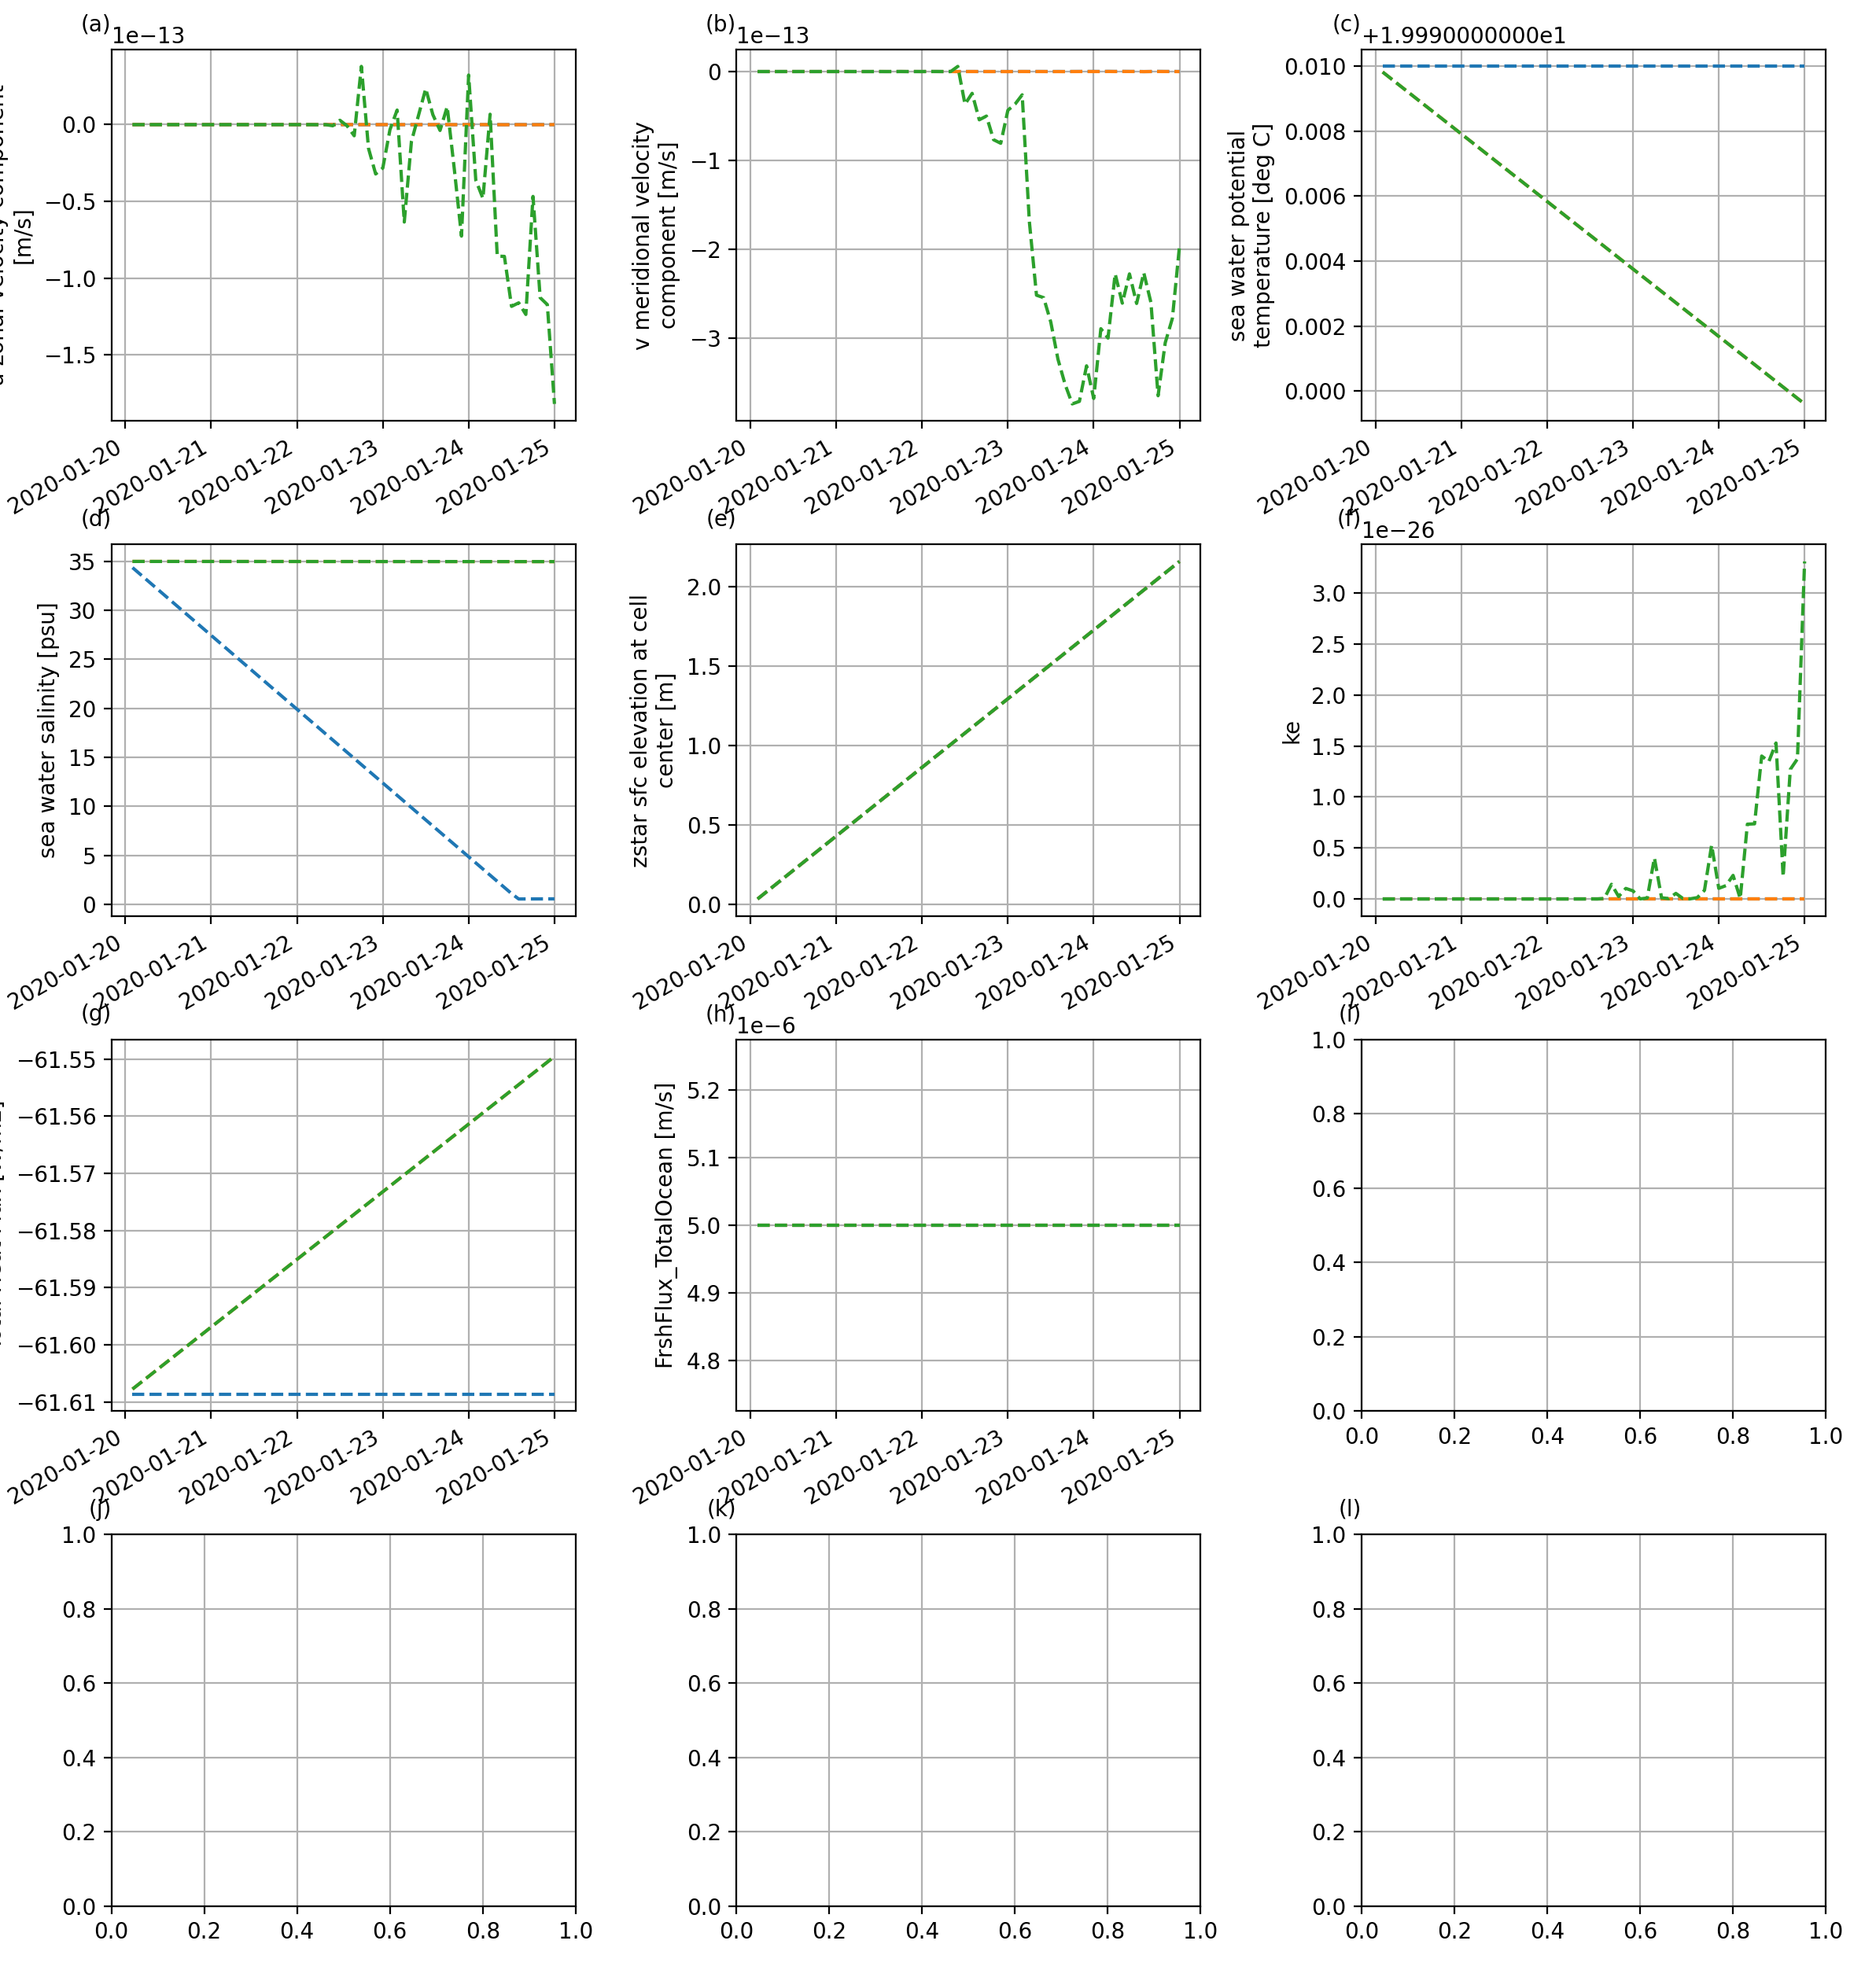

In [11]:
hca, hcb = pyic.arrange_axes(3,4, plot_cb=False, asp=0.8, fig_size_fac=1.5, sharex=False, sharey=False)
ii=-1

for var in ['u', 'v', 'to', 'so', 'zos', 'ke', 'HeatFlux_Total', 'FrshFlux_TotalOcean']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    if var not in ['zos', 'HeatFlux_Total', 'FrshFlux_TotalOcean']:
        isel = dict(depth_2=0, ncells=10)
        
    else:
        isel = dict(ncells=10)
    Sims[1].ds[var].isel(isel).plot(ax=ax, linestyle='--')
    Sims[2].ds[var].isel(isel).plot(ax=ax, linestyle='--')
    Sims[3].ds[var].isel(isel).plot(ax=ax, linestyle='--')

for ax in hca:
    ax.grid(True)
    ax.set_title('')
    ax.set_xlabel('')

<IPython.core.display.Javascript object>


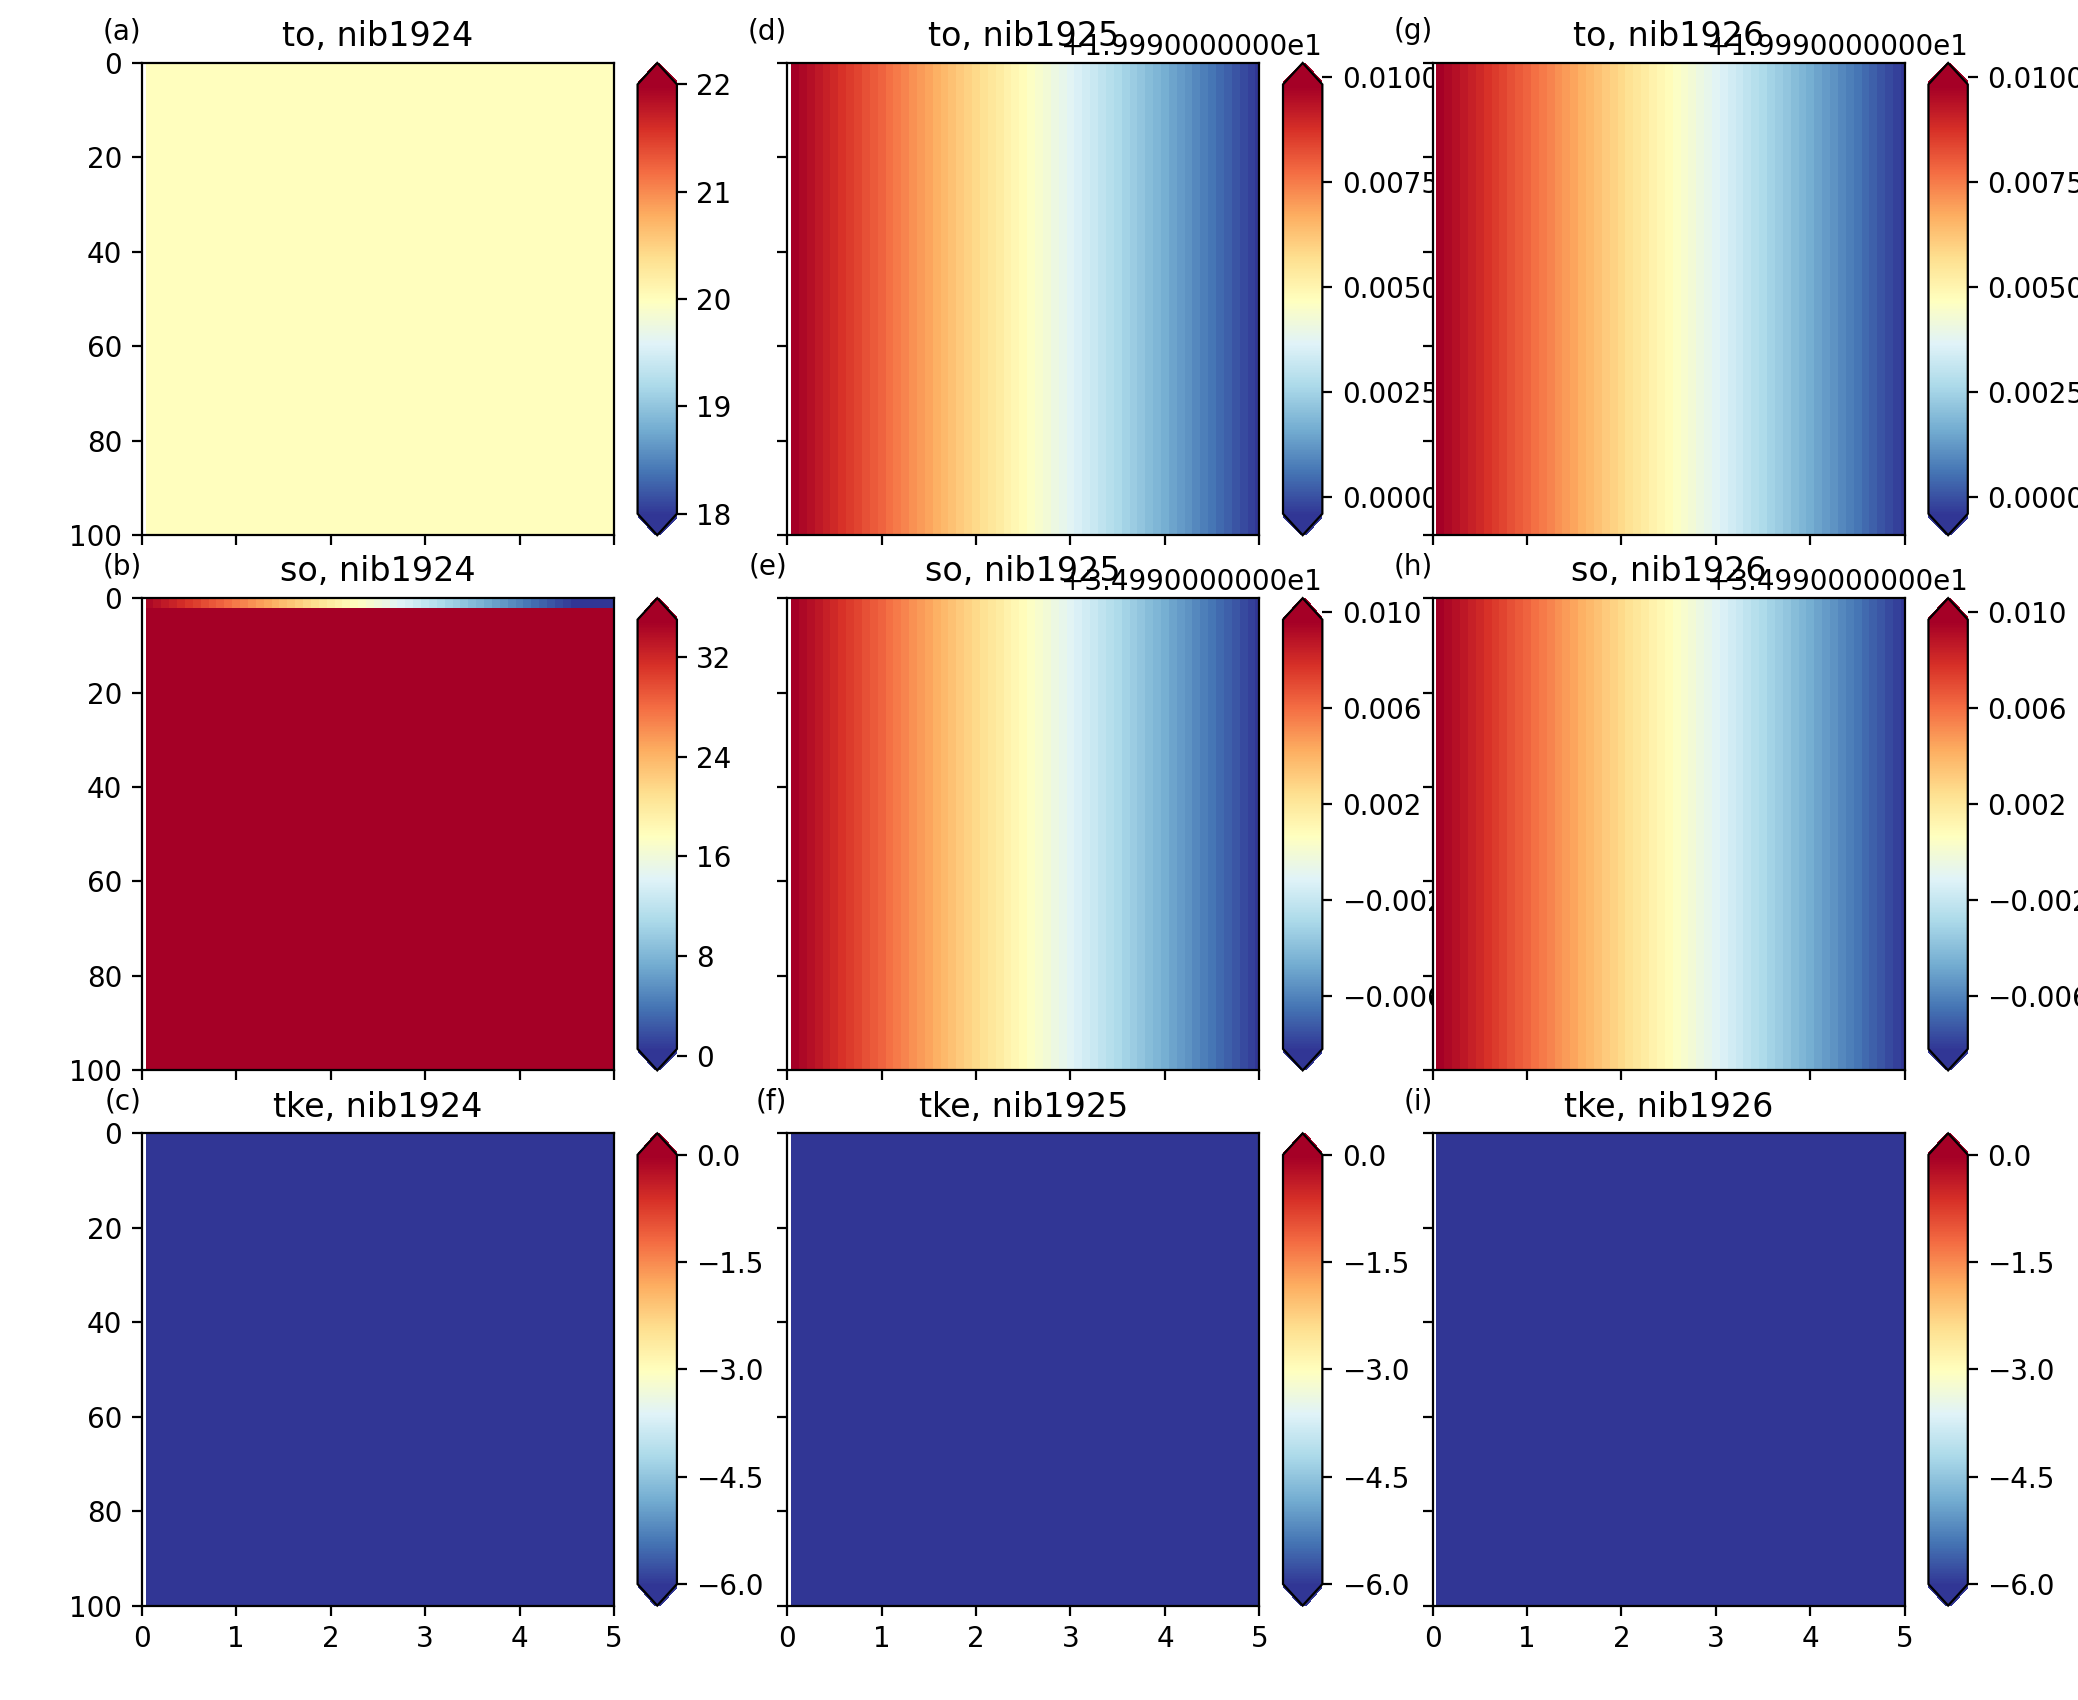

var = to, run = nib1924_zstar_sft12_only_precip
var = so, run = nib1924_zstar_sft12_only_precip
var = to, run = nib1925_zstar_sft14_only_precip
var = so, run = nib1925_zstar_sft14_only_precip
var = to, run = nib1926_zstar_sft15_only_precip
var = so, run = nib1926_zstar_sft15_only_precip


In [14]:
hca, hcb = pyic.arrange_axes(3,3, plot_cb=True, asp=1., fig_size_fac=1.5, sharex=True, sharey=True,
                            reverse_order=True)
ii=-1

nc = 10

Dclim = dict(
u='sym',
v='sym',
to='sym',
so='sym',
ke='sym',
tke='sym',
)

Dclim = dict(
# to=[19.9, 20],
to='auto',
# so=[34.98, 35.0],
so='auto',
tke=[-6, 0],
)

dt = (S.ds.time-S.ds.time[0]).astype(float)/86400/1e9

for nn, S in enumerate(Sims[1:]):
    for var in ['to', 'so']:
        print(f'var = {var}, run = {S.run}')
        ii+=1; ax=hca[ii]; cax=hcb[ii]
        pyic.shade(dt, S.ds.depth_2, S.ds[var].isel(ncells=nc).transpose(), ax=ax, cax=cax, clim=Dclim[var])
        ax.set_title(f'{var}, {S.run.split("_")[0]}')
    
    for var in ['tke']:
        ii+=1; ax=hca[ii]; cax=hcb[ii]
        pyic.shade(dt, S.ds.depth, S.ds[var].isel(ncells=nc).data.transpose(), ax=ax, cax=cax, clim=Dclim[var], logplot=True)
        ax.set_title(f'{var}, {S.run.split("_")[0]}')

for ax in hca:
    ax.set_ylim(100,0)

## Difference 14 and 15

In [18]:
ds = Sims[2].ds - Sims[3].ds

<IPython.core.display.Javascript object>


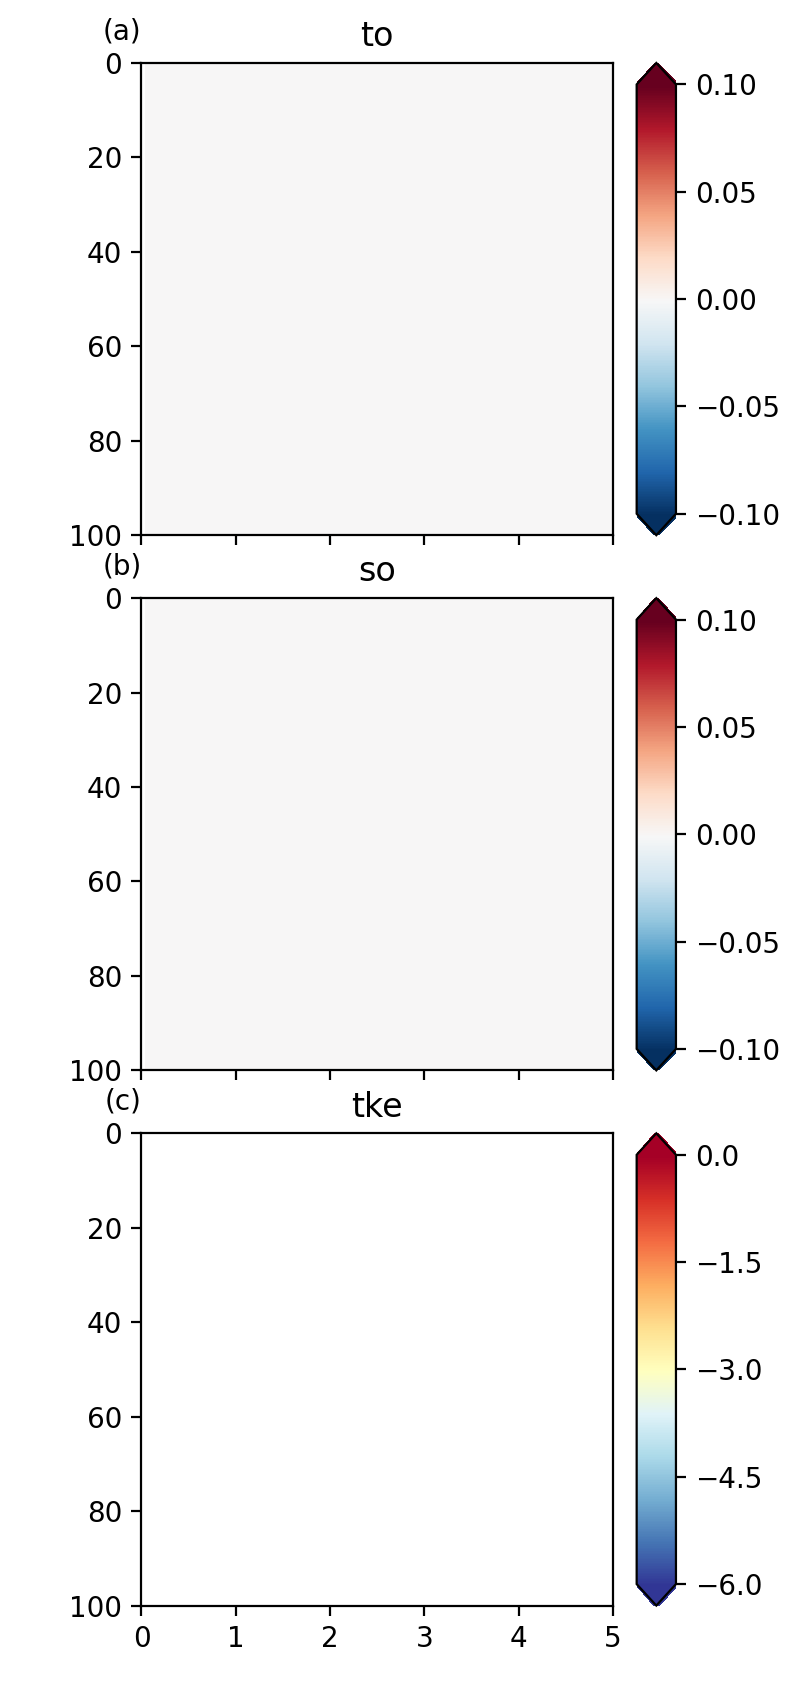

var = to
var = so


In [20]:
hca, hcb = pyic.arrange_axes(1,3, plot_cb=True, asp=1., fig_size_fac=1.5, sharex=True, sharey=True,
                            reverse_order=True)
ii=-1

nc = 10

Dclim = dict(
# to=[19.9, 20],
to='auto',
# so=[34.98, 35.0],
so='auto',
tke=[-6, 0],
)

dt = (ds.time-ds.time[0]).astype(float)/86400/1e9


for var in ['to', 'so']:
    print(f'var = {var}')
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(dt, ds.depth_2, ds[var].isel(ncells=nc).transpose(), ax=ax, cax=cax, clim=Dclim[var])
    ax.set_title(f'{var}')

for var in ['tke']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(dt, ds.depth, ds[var].isel(ncells=nc).data.transpose(), ax=ax, cax=cax, clim=Dclim[var], logplot=True)
    ax.set_title(f'{var}')

for ax in hca:
    ax.set_ylim(100,0)

## Difference to z

In [48]:
%%time
# ds1 = list(Sims.values())[1].ds-list(Sims.values())[0].ds
# ds2 = list(Sims.values())[2].ds-list(Sims.values())[0].ds
# ds3 = list(Sims.values())[3].ds-list(Sims.values())[0].ds

ds1 = Sims[1].ds - Sims[0].ds
ds2 = Sims[2].ds - Sims[0].ds
ds3 = Sims[3].ds - Sims[0].ds

CPU times: user 108 ms, sys: 256 ms, total: 364 ms
Wall time: 351 ms


<IPython.core.display.Javascript object>


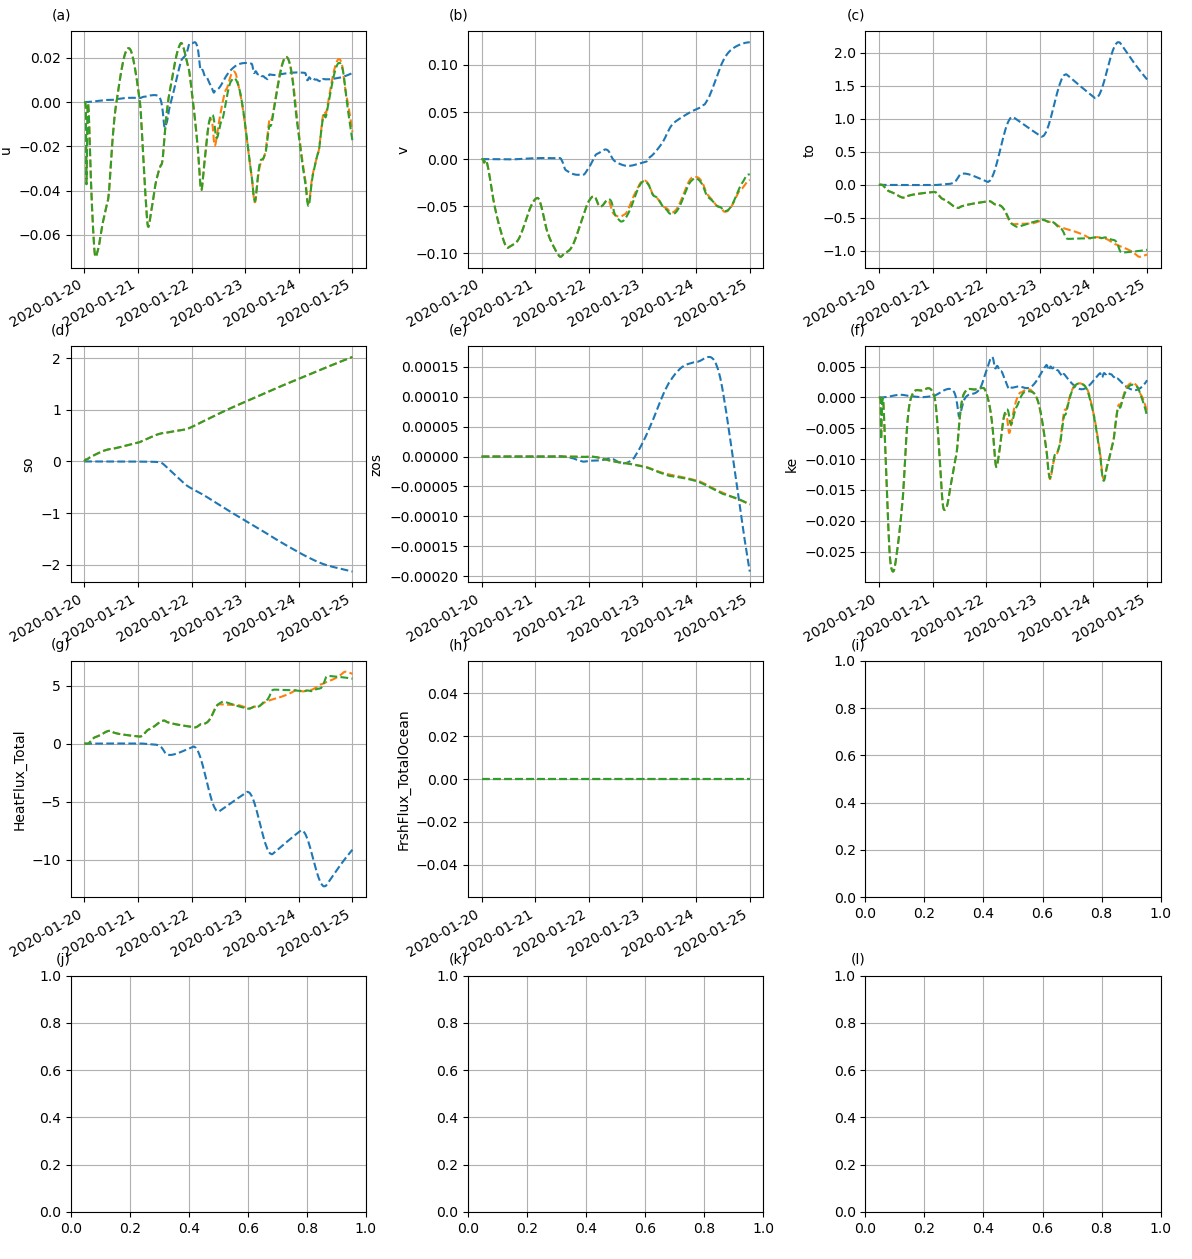

In [35]:
hca, hcb = pyic.arrange_axes(3,4, plot_cb=False, asp=0.8, fig_size_fac=1.5, sharex=False, sharey=False)
ii=-1

for var in ['u', 'v', 'to', 'so', 'zos', 'ke', 'HeatFlux_Total', 'FrshFlux_TotalOcean']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    if var not in ['zos', 'HeatFlux_Total', 'FrshFlux_TotalOcean']:
        isel = dict(depth_2=0, ncells=10)
        
    else:
        isel = dict(ncells=10)
    ds1[var].isel(isel).plot(ax=ax, linestyle='--')
    ds2[var].isel(isel).plot(ax=ax, linestyle='--')
    ds3[var].isel(isel).plot(ax=ax, linestyle='--')

for ax in hca:
    ax.grid(True)
    ax.set_title('')
    ax.set_xlabel('')

In [24]:
dt = (ds1.time-ds1.time[0]).astype(float)/86400/1e9

<IPython.core.display.Javascript object>


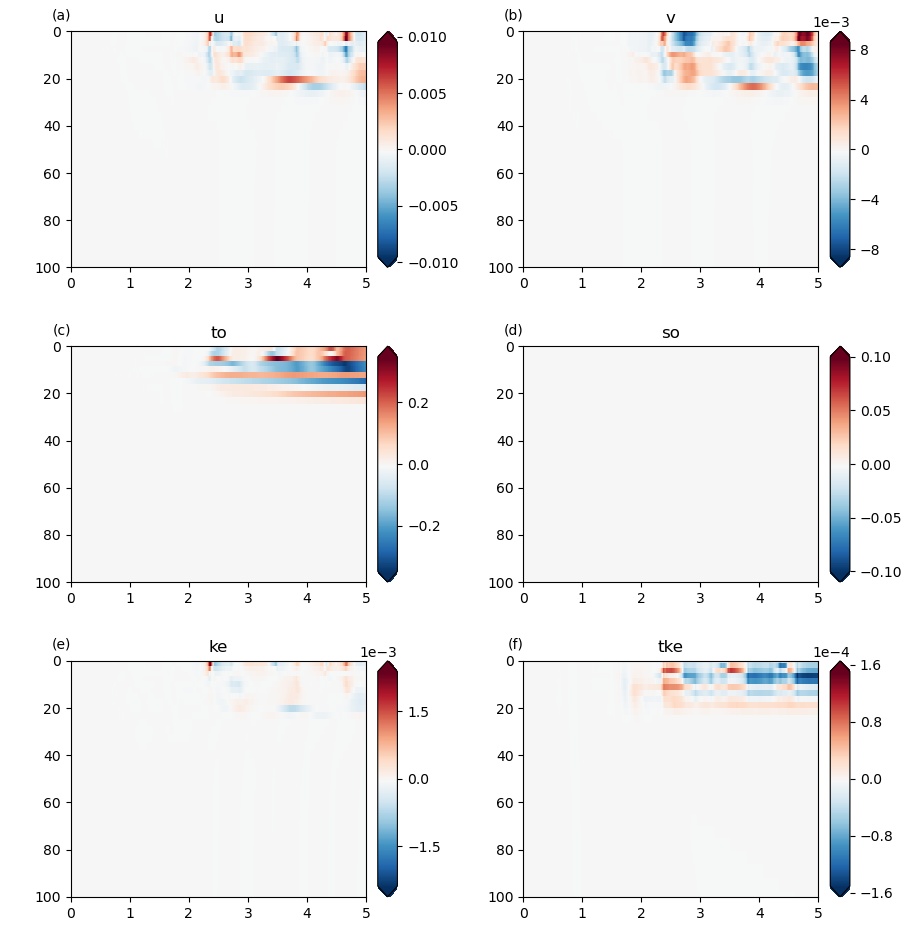

In [29]:
hca, hcb = pyic.arrange_axes(2,3, plot_cb=True, asp=0.8, fig_size_fac=1.5, sharex=False, sharey=False)
ii=-1

nc = 10

Dclim = dict(
u='sym',
v='sym',
to='sym',
so='sym',
ke='sym',
tke='sym',
)

for var in ['u', 'v', 'to', 'so', 'ke']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(dt, ds1.depth_2, ds1[var].isel(ncells=nc).transpose(), ax=ax, cax=cax, clim=Dclim[var])
    ax.set_title(var)
    
for var in ['tke']:
    ii+=1; ax=hca[ii]; cax=hcb[ii]
    pyic.shade(dt, ds.depth, ds[var].isel(ncells=nc).data.transpose(), ax=ax, cax=cax, clim=Dclim[var])
    ax.set_title(var)

for ax in hca:
    ax.set_ylim(100,0)